In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Читаем issues1.csv
data1 = pd.read_csv('issues1.csv', index_col=0)
# Преобразование дат в data1
data1['Issue_reported_Date'] = pd.to_datetime(data1['Issue_reported_Date'], dayfirst=True)
data1['Issue_responded_Date'] = pd.to_datetime(data1['Issue_responded_Date'], dayfirst=True)
# Формат опросной даты соответствует строке вида '01-Aug-23'
data1['Survey_response_Date'] = pd.to_datetime(data1['Survey_response_Date'], format='%d-%b-%y')

# Читаем issues2.csv
data2 = pd.read_csv('issues2.csv', index_col=0)
# Переименовываем колонки, чтобы привести их к общему виду с data1
data2 = data2.rename(columns={
    'channel_name': 'Channel',
    'Reported at': 'Issue_reported_Date',
    'Responded at': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
})
# Преобразование дат. В данном файле метод to_datetime должен корректно распознать большинство форматов,
# но для столбца с датой опроса указан формат '%d %m %Y' (при необходимости можно откорректировать)
data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'])
data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'])
data2['Survey_response_Date'] = pd.to_datetime(data2['Survey_response_Date'], format='%d %m %Y')

# Читаем issues4.csv (третья таблица)
data3 = pd.read_csv('issues4.csv', index_col=0)
# Приводим названия столбцов к нужному виду
data3 = data3.rename(columns={
    'Unique id': 'Id',
    'channel_name': 'Channel',
    'Issue_reported at': 'Issue_reported_Date',
    'issue_responded': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
    'Agent': 'Agent_name'
})
data3['Issue_reported_Date'] = pd.to_datetime(data3['Issue_reported_Date'])
data3['Issue_responded_Date'] = pd.to_datetime(data3['Issue_responded_Date'])
data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'])

# Приводим имена агентов в data3 к формату "И. Ф.", то есть сокращаем полное имя до инициалов.
data3['Agent_name'] = data3['Agent_name'].apply(
    lambda x: (x.split()[0][0] + ". " + x.split()[1]) if isinstance(x, str) and len(x.split())>=2 else x
)

C:\Users\ivant\AppData\Local\Temp\ipykernel_21860\3287975487.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'])
C:\Users\ivant\AppData\Local\Temp\ipykernel_21860\3287975487.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'])
C:\Users\ivant\AppData\Local\Temp\ipykernel_21860\3287975487.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'])


In [2]:
from scipy.stats import mode
mode([1,1,9,23,20,18,28])

ModeResult(mode=1, count=2)

In [3]:
eval('2,5*0,01 + 7,5*0,01 + 12,5*0,09 + 17,5*0,23 + 22,5*0,20 + 27,5*0,18 + 32,5*0,28'.replace(',','.'))

23.8

In [ ]:
(1182+1224+1152)/3

1186.0

: 

In [ ]:

depth = 100
def branch(depth):
    return '|   '*(depth-1) + '|—— '
            
for dir in data[path]['dirs']:
    path_ = os.path.join(path, dir)
    self.render_str = self.render_str + branch(depth) + path_ + '\n'
    self.render_json_(data, path_, depth+1)
    
for file in data[path]['files']:
    self.render_str = self.render_str + branch(depth) + file + '\n'

In [4]:
data_12 = pd.concat([data1, data2], sort=False)
print("Shape объединения data1 и data2:", data_12.shape)

# Далее объединяем data_12 с data3 (data3 не имеет колонки "Customer Remarks" и "Order_id")
data_123 = pd.concat([data_12, data3], sort=False)
print("Shape полного объединения (data_123):", data_123.shape)

Shape объединения data1 и data2: (72764, 11)
Shape полного объединения (data_123): (85907, 11)


In [5]:
duplicates = data_123.duplicated(subset=['Id']).sum()
print("Количество дубликатов по Id:", duplicates)
if duplicates == 0:
    print("Дубликатов нет.")
else:
    print("Найдено дубликатов, необходимо обработать.")

Количество дубликатов по Id: 0
Дубликатов нет.


In [6]:
# Читаем orders.csv
orders_data = pd.read_csv('orders.csv', index_col=0)
# Переименовываем столбец Id -> Order_id для удобства слияния
orders_data = orders_data.rename(columns={'Id': 'Order_id'})
# Преобразуем дату заказа (если требуется, можно задать формат)
orders_data['order_date_time'] = pd.to_datetime(orders_data['order_date_time'], dayfirst=True, errors='coerce')


In [7]:
data_with_orders = data_123.merge(orders_data, on='Order_id', how='left')
print("Shape после слияния с заказами:", data_with_orders.shape)

Shape после слияния с заказами: (85907, 15)


In [8]:
order_check = 'a5464619-b2d8-49de-9346-5e5db0972756'
print("Заказ для Order_id =", order_check, ":\n", orders_data[orders_data.Order_id == order_check])
# 2. Для найденного заказа выводим строку из data_with_orders, чтобы убедиться в корректном соединении.
found_row = data_with_orders[data_with_orders['Order_id'] == orders_data['Order_id'].iloc[0]]
print("Пример строки с найденным Order_id:\n", found_row.head())

Заказ для Order_id = a5464619-b2d8-49de-9346-5e5db0972756 :
 Empty DataFrame
Columns: [Order_id, order_date_time, Customer_City, Product_category, Item_price]
Index: []
Пример строки с найденным Order_id:
 Empty DataFrame
Columns: [Id, Channel, category, Sub-category, Customer Remarks, Order_id, Issue_reported_Date, Issue_responded_Date, Survey_response_Date, Agent_name, CSAT Score, order_date_time, Customer_City, Product_category, Item_price]
Index: []


In [9]:
inner_merge = data_123.merge(orders_data, on='Order_id', how='inner')
outer_merge = data_123.merge(orders_data, on='Order_id', how='outer')
print("Shape inner merge (только совпадающие заказы):", inner_merge.shape)
print("Shape outer merge (все записи из обеих таблиц):", outer_merge.shape)

Shape inner merge (только совпадающие заказы): (16951, 15)
Shape outer merge (все записи из обеих таблиц): (155026, 15)


In [10]:
# Читаем данные об агентах
agent_data = pd.read_csv("agents.csv", index_col=0)

# Приводим полное имя агента к нужному формату "И. Ф."
agent_data['Agent_name'] = agent_data['Agent'].apply(
    lambda x: (x.split()[0][0] + ". " + x.split()[1]) if isinstance(x, str) and len(x.split())>=2 else x
)

# Проверим, что в agent_data для одного сокращённого имени может быть несколько вариантов (например, "J. Moore").
agent_counts = agent_data['Agent_name'].value_counts()
print("Примеры количества записей по инициалах агентов:\n", agent_counts.head(10))

# Для слияния с данными обращений из data_with_orders используем merge по столбцу Agent_name.
# Однако, если для некоторого инициала имеется несколько вариантов из agent_data,
# оставляем только те обращения, у которых имеется однозначное соответствие (значение count == 1).
# Для этого добавим во временный датафрейм количество совпадений
agent_num = agent_data['Agent_name'].value_counts()
data_with_agents_temp = data_with_orders.merge(agent_num.rename('agent_count'), left_on='Agent_name', right_index=True, how='left')


Примеры количества записей по инициалах агентов:
 Agent_name
J. Moore       6
A. Brown       4
M. Smith       4
D. Smith       4
K. Martin      4
R. Smith       4
J. Williams    4
S. Williams    3
A. Harris      3
M. Allen       3
Name: count, dtype: int64


Shape после слияния с агентами: (85907, 23)


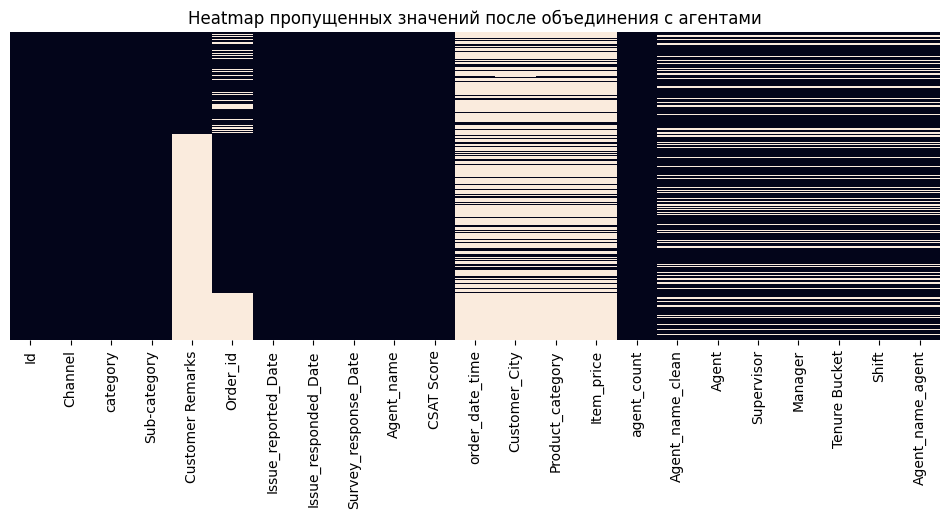

In [11]:
data_with_agents_temp['Agent_name_clean'] = data_with_agents_temp['Agent_name'].where(data_with_agents_temp['agent_count'] == 1, np.nan)

# Далее объединяем с информацией из agent_data – таким образом, для строк с неоднозначными ИНИЦИАЛАМИ информация об агенте не присоединяется.
data_with_agents = data_with_agents_temp.merge(agent_data, how='left', left_on='Agent_name_clean', right_on='Agent_name', suffixes=('', '_agent'))
print("Shape после слияния с агентами:", data_with_agents.shape)

# Оценим пропуски после объединения с агентами (график пропущенных значений)
plt.figure(figsize=(12,4))
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False)
plt.title("Heatmap пропущенных значений после объединения с агентами")
plt.show()

KeyError: 'Item_price'

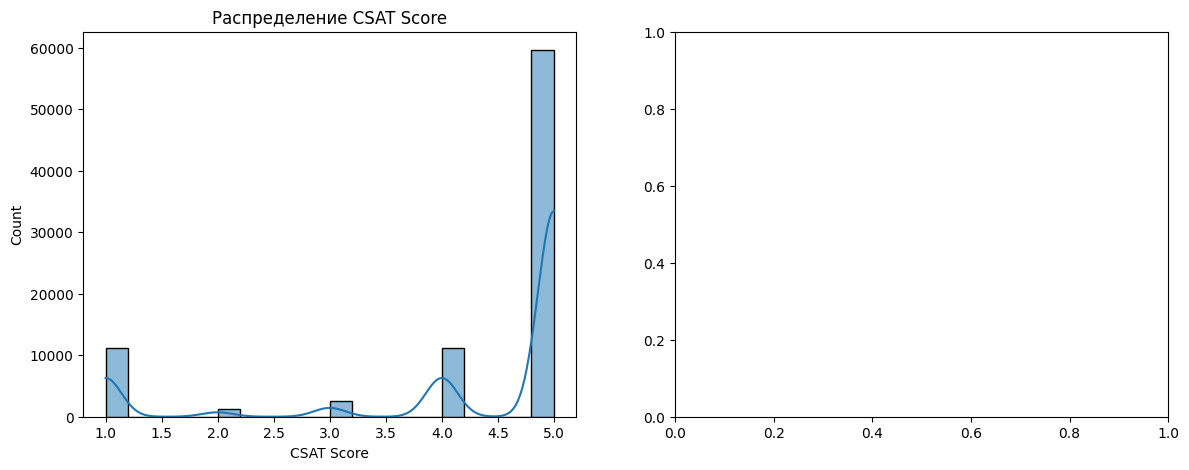

In [12]:
# Для горизонтальной интеграции (issues1 и issues2) построим графики для каждого признака.
# Для числовых колонок – гистограмма; для категориальных – countplot.
# Определим списки колонок:
numeric_cols = ['CSAT Score']  # В данных данный столбец числовой; возможно, Item_price после соединения тоже
categorical_cols = ['Channel', 'category', 'Sub-category', 'Agent_name']

# Если после объединения с заказами существует числовой столбец цены, добавим его
if 'Item_price' in data_with_orders.columns:
    numeric_cols.append('Item_price')

# Построим графики распределения для data_123 (до соединения с заказами или агентами)
plt.figure(figsize=(14, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.histplot(data_123[col].dropna(), kde=True, bins=20)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

# Для категориальных столбцов – построим столбчатые диаграммы (countplot).
plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i+1)
    sns.countplot(y=data_123[col], order=data_123[col].value_counts().index)
    plt.title(f'Частотное распределение {col}')
plt.tight_layout()
plt.show()